In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - Carregando dataset da bolsa de valores da Petrobras
* Data set da Bolsa de valores da Petrobas de 2010 a 2017
* Date - dia
* Open - O valor de abertura da ação no dia
* High - Valor máximo que a ação chegou no dia
* Low - Valor mínimo da ação no dia
* Close - Preço de fechamento no dia
* Adj Close - Preço de fechamento no dia após ser contabilização as ações corporativas
* Volume - Volume negociado no dia

In [2]:
#Lendo a base de dados da bolsa de valores da Petrobras de 2017
petr = pd.read_csv("PETR4.csv")
petr.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,2017-07-03,12.28,12.41,12.22,12.36,11.795148,31542500
1,2017-07-04,12.34,12.43,12.32,12.43,11.861949,12523500
2,2017-07-05,12.38,12.52,12.12,12.21,11.652003,41958400
3,2017-07-06,12.28,12.36,12.08,12.17,11.613831,51976900
4,2017-07-07,12.13,12.17,11.85,11.93,11.384799,42677000


In [3]:
#elimina ultima columa
petr = petr.drop('Volume',1)

C:\Users\RENATA~1.PAR\AppData\Local\Temp/ipykernel_44040/3351695083.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  petr = petr.drop('Volume',1)


In [4]:
#Estatísticas dos valores
petr.describe()

,Open,High,Low,Close,AdjClose
count,499.000000,499.000000,499.000000,499.000000,499.000000
mean,20.827134,21.115250,20.516633,20.806032,20.164855
std,4.875028,4.930755,4.797126,4.864584,5.004659
min,11.830000,12.010000,11.740000,11.930000,11.384799
25%,16.190001,16.345000,16.059999,16.175000,15.450116
50%,20.590000,21.070000,20.250000,20.520000,19.582233
75%,25.755000,26.040001,25.330000,25.570000,25.044139
max,29.549999,29.600000,28.980000,29.250000,29.119148


In [5]:
petr.corr()

,Open,High,Low,Close,AdjClose
Open,1.000000,0.998343,0.997339,0.995384,0.993175
High,0.998343,1.000000,0.996881,0.997512,0.994625
Low,0.997339,0.996881,1.000000,0.998272,0.996730
Close,0.995384,0.997512,0.998272,1.000000,0.997904
AdjClose,0.993175,0.994625,0.996730,0.997904,1.000000


Text(0, 0.5, 'Close')

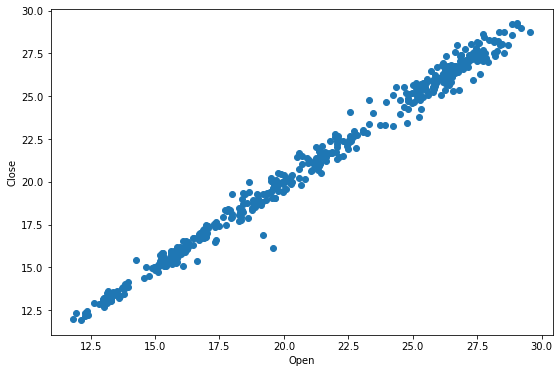

In [6]:
figure = plt.figure(figsize=(9,6))
plt.scatter(petr['Open'],petr['Close'])
plt.xlabel('Open')
plt.ylabel('Close')

Text(0, 0.5, 'Low')

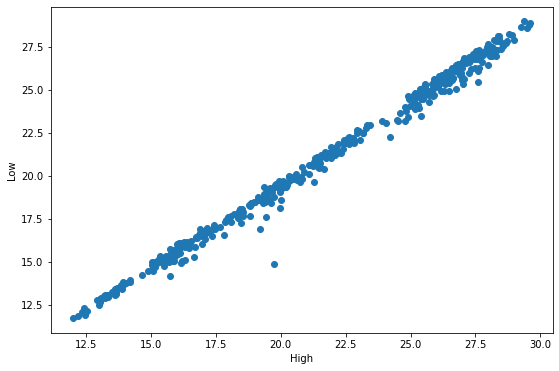

In [7]:
figure = plt.figure(figsize=(9,6))
plt.scatter(petr['High'],petr['Low'])
plt.xlabel('High')
plt.ylabel('Low')

In [8]:
#Create a numpy array with Open values as feature
X = petr.iloc[:,1].values
#Create a numpy array for classe Close
y = petr.iloc[:,4].values

In [9]:
type(X)

numpy.ndarray

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=1)
print(len(X_train))
print(len(X_test))

449
50


In [11]:
X_train.shape

(449,)

In [12]:
#Reshape the train dataset to have a matrix instead of an array
m = len(X_train)
X_train = X_train.reshape(m,1)
X_train.shape

(449, 1)

## Linear Regression 
![](https://lh3.googleusercontent.com/l75k9861ylydP17cz-gGPBO-WcbNcU9MqC5jrefpyE2tfvdZdehFdyTSfwpzuXM-Onvt5g=s170)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

ln = LinearRegression()
model = ln.fit(X_train,y_train)

## Score
Return the coefficient of determination  of the prediction.
The coefficient  is defined as 1-(u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_pred.mean()) ** 2).sum(). 

In [14]:
print(f'score = {model.score(X_train,y_train)}')
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

score = 0.991068999267438
alpha = 0.0771242102474119
betas = [0.99545576]


## Avaliação

In [15]:
from sklearn.metrics import mean_absolute_error
n=len(X_test)
X_test = X_test.reshape(n,1)
y_pred = ln.predict(X_test)

print('Mean absolute error sklearn: %.3f' % mean_absolute_error(y_test,y_pred))

Mean absolute error sklearn: 0.371


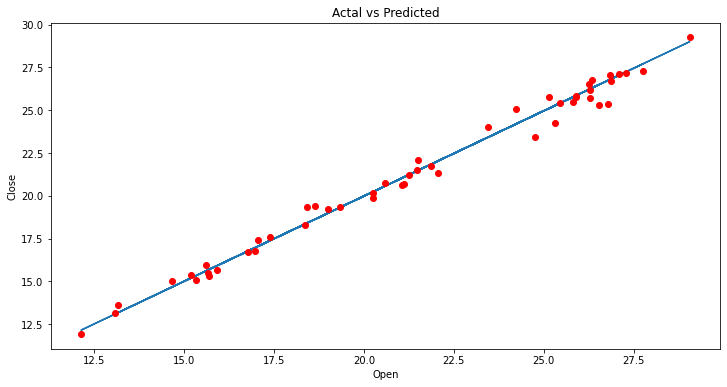

In [16]:
#Plot regression against actual data
plt.figure(figsize=(12,6))
#regression line
plt.plot(X_test,y_pred)
#scatter plot showing actual data
plt.plot(X_test,y_test,'ro')
plt.title('Actal vs Predicted')
plt.xlabel('Open')
plt.ylabel('Close')

plt.show()

In [17]:
#Multiple Linear Regression
#Create a np array with Open, High and Low values as feature
X_new = petr.iloc[:,1:-2].values
#Create a np array for Close values with is the target
y = petr.iloc[:,4].values

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.10,random_state=1)
print(len(X_train))
print(len(X_test))

449
50


In [19]:
multiple_lr = LinearRegression()
multi_model = multiple_lr.fit(X_train,y_train)

In [20]:
np.savetxt("treino.txt",X_train) 

## Score
Return the coefficient of determination  of the prediction.
The coefficient  is defined as 1-(u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 

In [21]:
print(f'score = {multi_model.score(X_train,y_train)}')
print(f'alpha = {multi_model.intercept_}')
print(f'betas = {multi_model.coef_}')

score = 0.9987215806493019
alpha = -0.02817270595385679
betas = [-0.69888445  0.85351419  0.84674238]


## Avaliação

In [23]:
y_pred_multi = multi_model.predict(X_test)
print('Mean absolute error sklearn: %.3f' % mean_absolute_error(y_test,y_pred_multi))

Mean absolute error sklearn: 0.147
